# Data Wrangling Executive Summary


---
# Data Wrangling

We need to acquire and prepare:
1. Curriculum Access Logs
2. Cohort ID Table

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import timedelta

# import helper functions
import main
import acquire
import prepare

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Acquisition
---
Both datasets are saved locally. We can use functions contained in `src/acquire.py` to read in our datasets.

In [2]:
# Load currciculum access logs
df = acquire.get_log_data()

# Load cohort id data
df_cohorts = acquire.get_cohort_data()

## Curriculum Access Logs

In [3]:
print(df.shape)
df.head()

(719459, 6)


,date,time,page_viewed,user_id,cohort_id,ip
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719459 entries, 0 to 719458
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   date         719459 non-null  object 
 1   time         719459 non-null  object 
 2   page_viewed  719458 non-null  object 
 3   user_id      719459 non-null  int64  
 4   cohort_id    674619 non-null  float64
 5   ip           719459 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 32.9+ MB


In [5]:
df.describe()

,user_id,cohort_id
count,719459.000000,674619.000000
mean,392.945478,37.173660
std,211.655544,14.971385
min,1.000000,1.000000
25%,230.000000,26.000000
50%,417.000000,32.000000
75%,568.000000,53.000000
max,787.000000,62.000000


In [6]:
df.nunique()

date            1012
time           70937
page_viewed     2153
user_id          787
cohort_id         40
ip              4339
dtype: int64

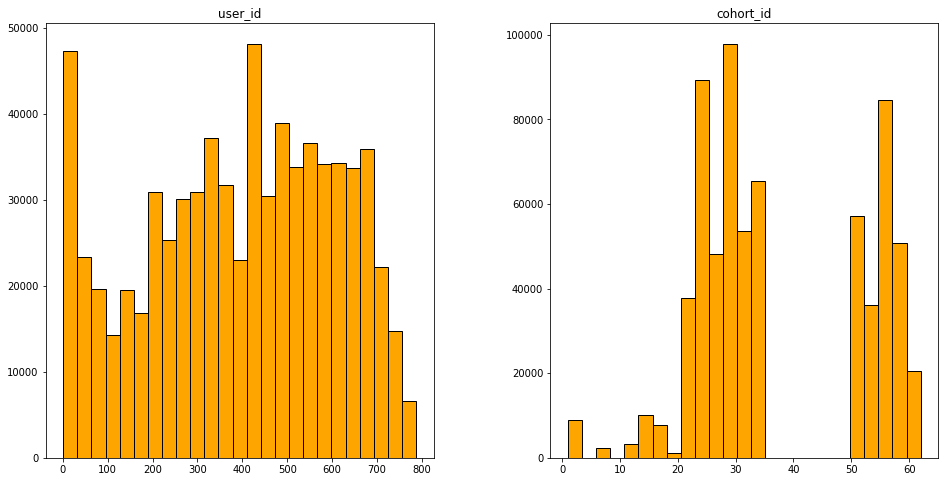

In [7]:
df.hist(figsize=(16, 8),
        color='orange',
        ec='black',
        grid=False,
        bins=25);

### Curriculum Access Logs's: Initial Review
1. 719,459 rows and 6 columns.
2. Missing values in columns: `cohort_id` and  `page_viewed`.
3. `date` and `time` columns are object data types. In data prep, cast into datetime data type.
4. 787 Unique `user_id`'s - unique, sequential, non-nan values.
5. 1012 days of logs.
6. 2153 unique pages users accessed.
7. 4339 unique `ip` addresses
6. 40 cohorts
---
## Cohort ID's

In [8]:
print(df_cohorts.shape)
df_cohorts.head()

(46, 5)


,cohort_id,name,start_date,end_date,program_id
0,1,Arches,2014-02-04,2014-04-22,1
1,2,Badlands,2014-06-04,2014-08-22,1
2,3,Carlsbad,2014-09-04,2014-11-05,1
3,4,Denali,2014-10-20,2015-01-18,1
4,5,Everglades,2014-11-18,2015-02-24,1


In [9]:
df_cohorts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   cohort_id   46 non-null     int64 
 1   name        46 non-null     object
 2   start_date  46 non-null     object
 3   end_date    46 non-null     object
 4   program_id  46 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1.9+ KB


In [10]:
df_cohorts.nunique()

cohort_id     46
name          46
start_date    44
end_date      45
program_id     4
dtype: int64

In [11]:
df_cohorts.describe()

,cohort_id,program_id
count,46.000000,46.000000
mean,29.369565,1.869565
std,24.478888,0.748590
min,1.000000,1.000000
25%,12.250000,1.000000
50%,23.500000,2.000000
75%,46.750000,2.000000
max,132.000000,4.000000


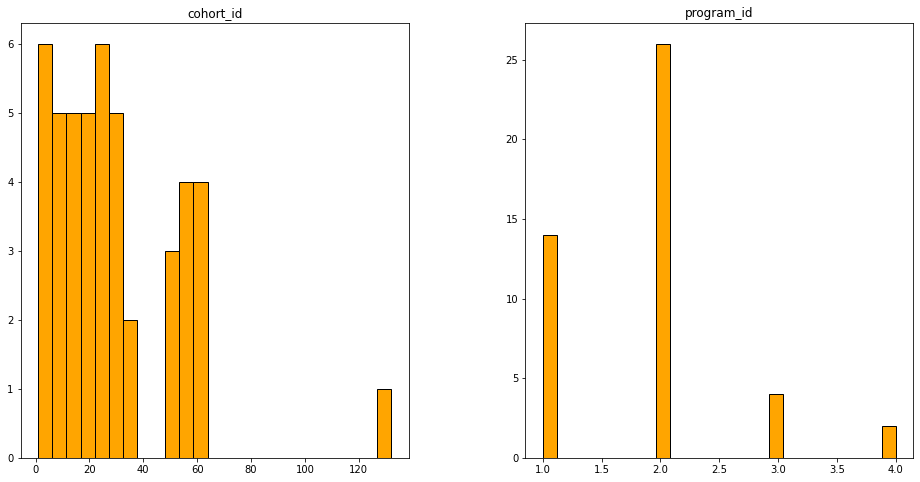

In [12]:
df_cohorts.hist(figsize=(16, 8),
                color='orange',
                ec='black',
                grid=False,
                bins=25);

### Cohort ID data: Initial Review

- 46 columns and 5 rows.
- 46 cohorts with 46 unique cohort id's.
- 4 Cohorts started on the same date.
- 2 Cohorts ended on the same date.
- 4 unique `program_id`'s to determine the class type: Web Development or Data Science.
- `start_date` and `end_date` columns are object data types. Cast into datetime data types.

# Data Preparation

1. Merge the datasets together.
2. Convert `date`, `time`, `start_date`, and  `end_date` object columns into datetime data types.
3. Convert `cohort_id` and `program_id` float64 columns into integer data types.

In [13]:
df_main = df.merge(df_cohorts, on='cohort_id', how='left')

In [16]:
df_main = df_main.fillna(0)

In [17]:
df_main = df_main.assign(

date = pd.to_datetime(df_main['date']),
    
time = pd.to_datetime(df_main['time']),
    
start_date = pd.to_datetime(df_main['start_date']),
    
end_date = pd.to_datetime(df_main['end_date']),
    
cohort_id = df_main.cohort_id.astype(np.int),
    
program_id = df_main.program_id.astype(np.int)

)

In [20]:
df_main.loc[df_main.program_id == 1]

,date,time,page_viewed,user_id,cohort_id,ip,name,start_date,end_date,program_id
0,2018-01-26,2020-11-09 09:55:03,/,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,1
1,2018-01-26,2020-11-09 09:56:02,java-ii,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,1
2,2018-01-26,2020-11-09 09:56:05,java-ii/object-oriented-programming,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,1
3,2018-01-26,2020-11-09 09:56:06,slides/object_oriented_programming,1,8,97.105.19.61,Hampton,2015-09-22,2016-02-06,1
30,2018-01-26,2020-11-09 10:14:47,/,11,1,97.105.19.61,Arches,2014-02-04,2014-04-22,1
...,...,...,...,...,...,...,...,...,...,...
668987,2020-09-13,2020-11-09 14:43:04,content/php_iv/exceptions/try-catch.html,210,17,71.56.144.20,Olympic,2017-02-06,2017-05-25,1
668988,2020-09-13,2020-11-09 14:43:10,content/php_iv/classes-and-objects-ii,210,17,71.56.144.20,Olympic,2017-02-06,2017-05-25,1
668989,2020-09-13,2020-11-09 14:43:12,content/php_iv/classes-and-objects-ii/visibili...,210,17,71.56.144.20,Olympic,2017-02-06,2017-05-25,1
668990,2020-09-13,2020-11-09 14:43:38,content/php_iv/classes-and-objects-ii/magic-me...,210,17,71.56.144.20,Olympic,2017-02-06,2017-05-25,1


In [22]:
df_main.program_id.value_counts()

2    576508
3     68017
0     44840
1     30089
4         5
Name: program_id, dtype: int64